In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
train_csv = r"C:\Users\ABHINAV\Downloads\train-20230326T213916Z-001\train\Ground_Truth.csv"
df = pd.read_csv(train_csv)

In [4]:
lis = []
for i in range(df.shape[0]):
    if df.iloc[i][1] == "No Finding":
            lis.append(0)
    else:
            lis.append(1)

df["opt"] = lis
df.head() 


,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position,opt
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP,1
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP,1
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP,1
3,00000248_008.png,Atelectasis,248,87,M,AP,1
4,00000248_009.png,Atelectasis,248,87,M,AP,1


In [14]:
import pandas as pd

age_opt_df = df.groupby('Patient Age')['opt'].sum().reset_index()

# Rename the columns to 'age' and 'opt_sum'
age_opt_df.columns = ['age', 'opt_sum']

# Print the new dataframe
print(age_opt_df)


    age  opt_sum
0     0        4
1     1       22
2     2       27
3     3       34
4     4       31
..  ...      ...
90   90       24
91   91        5
92   92        1
93   93        2
94   95        0

[95 rows x 2 columns]


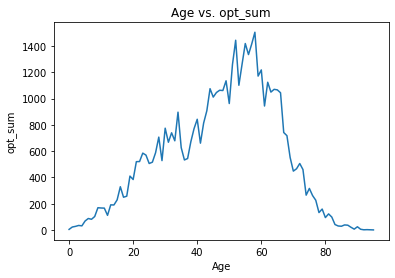

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename the columns to 'age' and 'opt_sum'
age_opt_df.columns = ['age', 'opt_sum']

# Plot the age vs. opt_sum data using Matplotlib
plt.plot(age_opt_df['age'], age_opt_df['opt_sum'])

# Set the title and axis labels
plt.title('Age vs. opt_sum')
plt.xlabel('Age')
plt.ylabel('opt_sum')

# Show the plot
plt.show()


In [16]:
import pandas as pd

def count_zeros_by_age(df):
    # Group the dataframe by age and count the number of zeros in the 'opt' column for each age
    age_zero_count_df = df.groupby('Patient Age')['opt'].apply(lambda x: (x == 0).sum()).reset_index()

    # Rename the columns to 'age' and 'opt_zero_count'
    age_zero_count_df.columns = ['age', 'opt_zero_count']

    return age_zero_count_df
# Read the dataset into a pandas dataframe


# Call the count_zeros_by_age function to create a new dataframe
age_zero_count_df = count_zeros_by_age(df)

# Print the new dataframe
print(age_zero_count_df)


    age  opt_zero_count
0     0              10
1     1              32
2     2              41
3     3              63
4     4              77
..  ...             ...
90   90               5
91   91               0
92   92               3
93   93               9
94   95               1

[95 rows x 2 columns]


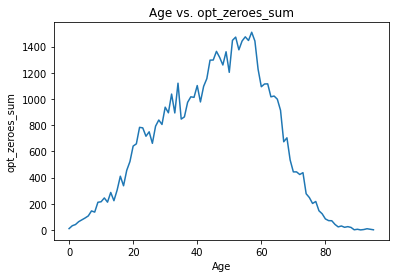

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename the columns to 'age' and 'opt_sum'
age_zero_count_df.columns = ['age', 'opt_sum']

# Plot the age vs. opt_sum data using Matplotlib
plt.plot(age_zero_count_df['age'], age_zero_count_df['opt_sum'])

# Set the title and axis labels
plt.title('Age vs. opt_zeroes_sum')
plt.xlabel('Age')
plt.ylabel('opt_zeroes_sum')

# Show the plot
plt.show()


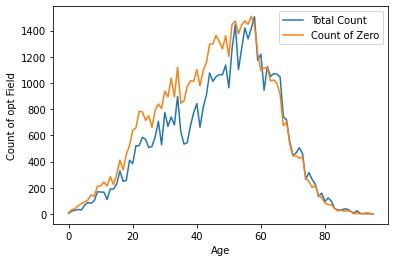

In [19]:
import matplotlib.pyplot as plt



# Call the count_zeros_by_age function to create a new dataframe
opt_zero_count_df = count_zeros_by_age(df)

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the two dataframes on the same graph
ax.plot(age_opt_df['age'], age_opt_df['opt_sum'], label='Total Count')
ax.plot(opt_zero_count_df['age'], opt_zero_count_df['opt_zero_count'], label='Count of Zero')

# Set the x-label and y-label
ax.set_xlabel('Age')
ax.set_ylabel('Count of opt Field')

# Add a legend
ax.legend()

# Show the plot
plt.show()


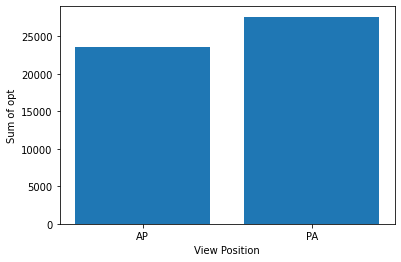

In [20]:
import matplotlib.pyplot as plt

# Group the dataframe by view position and sum the opt column
view_opt_sum = df.groupby('View Position')['opt'].sum()

# Create a bar plot with view position on the x-axis and the sum of opt's on the y-axis
plt.bar(view_opt_sum.index, view_opt_sum.values)

# Set the x-label and y-label
plt.xlabel('View Position')
plt.ylabel('Sum of opt')

# Show the plot
plt.show()
